<a href="https://colab.research.google.com/github/kapilgautamin/Machine-Learning-/blob/master/TensorFlow_SimpleNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Step 1 : Importing the MNIST data

In [0]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist = input_data.read_data_sets("MNIST_data",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [3]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [8]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
mnist.validation.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
mnist.test.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
mnist.train.num_examples

55000

In [12]:
mnist.validation.num_examples

5000

In [13]:
mnist.test.num_examples

10000

In [16]:
np.any(mnist.validation.images)

True

Step 2 - Visualising the data


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

55000 images each of 784 pixels = 28X28 size.

In [20]:
mnist.train.images.shape

(55000, 784)

In [21]:
mnist.train.images[100]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [0]:
my_img = mnist.train.images[100].reshape(28,28)

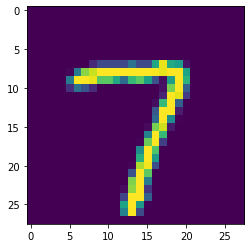

In [31]:
plt.imshow(my_img)

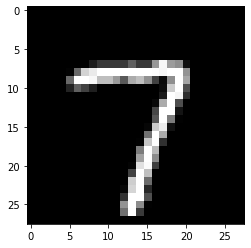

In [32]:
plt.imshow(my_img,cmap='gist_gray')

In [33]:
my_img.max()

0.9960785

In [35]:
my_img.min()


(784,)

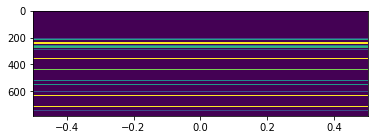

In [42]:
my_img2 = mnist.train.images[100].reshape(784,1)
plt.imshow(my_img2,aspect=0.0004)


##Step 3 - Building the Neural network
1. Placeholders
2. Variables
3. Create the computation graph
4. Loss Functions
5. Optimizer
6. Create and run the session

y = W x * b

In [0]:
x = tf.placeholder(tf.float32,shape=[None,784])

In [0]:
#Weights and Bias
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [0]:
#Create computation graph
y = tf.matmul(x,W) + b

In [123]:
y_true = tf.placeholder(tf.float32,shape=[None,10])
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits2(labels=y_true,logits=y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
#optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)

In [0]:
train = optimizer.minimize(cross_entropy)

In [0]:
init = tf.global_variables_initializer()

In [137]:
#Create and run the session
with tf.Session() as sess:
  sess.run(init)
  #Train 10000
  for step in range(20000):
    batch_x,batch_y = mnist.train.next_batch(100)
    sess.run(train,feed_dict = {x:batch_x, y_true:batch_y})
    #Evaluate the test/train model
  matches = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
  accuracy = tf.reduce_mean(tf.cast(matches,tf.float32))
  print(sess.run(accuracy, feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))

0.9283
